# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

## Elements of Structured Data

**Key Terms for Data Types**

- Numeric: Data that are expressed on a numeric scale.
  - Continuous: Data that can take on any value in an interval. (Synonyms: interval, float, numeric)
  - Discrete: Data that can take on only integer values, such as counts. (Synonyms: integer, count)
- Categorical: Data that can take on only a specific set of values representing a set of possible categories. (Synonyms: enums, enumerated, factors, nominal)
  - Binary: A special case of categorical data with just two categories of values, e.g., 0/1, true/false. (Synonyms: dichotomous, logical, indicator, boolean)
  - Ordinal: Categorical data that has an explicit ordering. (Synonym: ordered factor)


**Key Ideas** 

- Data is typically classified in software by type.
- Data types include numeric (continuous, discrete) and categorical (binary, ordinal).
- Data typing in software acts as a signal to the software on how to process the data.



## Rectangular Data

The typical frame of reference for an analysis in data science is a rectangular data object, like a spreadsheet or database table.


Key Terms for Rectangular Data

- Data frame: Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning models.
- Feature: A column within a table is commonly referred to as a feature.
    - Synonyms: attribute, input, predictor, variable
- Outcome: Many data science projects involve predicting an outcome—often a yes/no outcome (in Table 1-1, it is “auction was competitive or not”). The features are sometimes used to predict the outcome in an experiment or a study.
  - Synonyms: dependent variable, response, target, output
- Records: A row within a table is commonly referred to as a record.
  - Synonyms: case, example, instance, observation, pattern, sample

Table 1-1. A typical data frame format
| Category | currency | sellerRating | Duration | endDay | ClosePrice |	OpenPrice |	Competitive? | 
|---|---|---|---|---|---|---|---
| Music/Movie/Game | US | 3249 | 5| Mon|  0.01| 0.01| 0
| Music/Movie/Game | US | 3249 | 5 | Mon | 0.01 | 0.01 | 0 
| Automotive | US | 3115 | 7 | Tue | 0.01 | 0.01 | 0 
| Automotive | US | 3115 | 7 | Tue | 0.01 | 0.01 | 0 
| Automotive | US | 3115 | 7 | Tue | 0.01 | 0.01 | 0
| Automotive | US | 3115 | 7 | Tue | 0.01 | 0.01 | 0
| Automotive | US | 3115 | 7 | Tue | 0.01 | 0.01 | 1
| Automotive | US | 3115 | 7 | Tue | 0.01 | 0.01 | 1

In Table 1-1, there is a mix of measured or counted data (e.g., duration and price) and categorical data (e.g., category and currency). As mentioned earlier, a special form of categorical variable is a binary (yes/no or 0/1) variable, seen in the rightmost column in Table 1-1—an indicator variable showing whether an auction was competitive (had multiple bidders) or not. This indicator variable also happens to be an outcome variable, when the scenario is to predict whether an auction is competitive or not.

### Data Frames and Indexes

Traditional database tables have one or more columns designated as an index, essentially a row number. This can vastly improve the efficiency of certain database queries. In Python, with the pandas library, the basic rectangular data structure is a DataFrame object. By default, an automatic integer index is created for a DataFrame based on the order of the rows. In pandas, it is also possible to set multilevel/hierarchical indexes to improve the efficiency of certain operations.


**Key Ideas**

- The basic data structure in data science is a rectangular matrix in which rows are records and columns are variables (features). 
- Terminology can be confusing; there are a variety of synonyms arising from the different disciplines that contribute to data science (statistics, computer science, and information technology).



## Estimates of Location

Variables with measured or count data might have thousands of distinct values. A basic step in exploring your data is getting a “typical value” for each feature (variable): an estimate of where most of the data is located (i.e., its central tendency).

**Key Terms for Estimates of Location**

- Mean: The sum of all values divided by the number of values.
  - Synonym: average
- Weighted mean: The sum of all values times a weight divided by the sum of the weights.    
  - Synonym: weighted average
- Median: The value such that one-half of the data lies above and below.
  - Synonym: 50th percentile
- Percentile: The value such that P percent of the data lies below.
  - Synonym: quantile
- Weighted median: The value such that one-half of the sum of the weights lies above and below the sorted data.
- Trimmed mean: The average of all values after dropping a fixed number of extreme values.
  - Synonym: truncated mean
- Robust: Not sensitive to extreme values.
  - Synonym: resistant
- Outlier: A data value that is very different from most of the data.
  - Synonym: extreme value


**Metrics and Estimates**

Statisticians often use the term estimate for a value calculated from the data at hand, to draw a distinction between what we see from the data and the theoretical true or exact state of affairs. Data scientists and business analysts are more likely to refer to such a value as a metric. The difference reflects the approach of statistics versus that of data science: accounting for uncertainty lies at the heart of the discipline of statistics, whereas concrete business or organizational objectives are the focus of data science. Hence, statisticians estimate, and data scientists measure.

### Mean

The most basic estimate of location is the mean, or average value. The mean is the sum of all values divided by the number of values. Consider the following set of numbers: $\{3 5 1 2\}$. The mean is $(3 + 5 + 1 + 2) / 4 = 11 / 4 = 2.75$. You will encounter the symbol $\bar{x}$ (pronounced “x-bar”) being used to represent the mean of a sample from a population. The formula to compute the mean for a set of $n$ values $x_1,x_2,\ldots{},x_n$ is:
$$ \text{Mean} = \bar{x} = \cfrac{\Sigma_{i=1}^n x_i}{n} $$

**Note**: 
$N$ (or $n$) refers to the total number of records or observations. In statistics it is capitalized if it is referring to a population, and lowercase if it refers to a sample from a population. In data science, that distinction is not vital, so you may see it both ways.

A variation of the mean is a *trimmed mean*, which you calculate by dropping a fixed number of sorted values at each end and then taking an average of the remaining values. Representing the sorted values by $x_{(1)}, x_{(2)},\ldots{},x_{(n)}$ where $x_{(1)}$ is the smallest value and $x_{(n)}$ the largest, the formula to compute the trimmed mean with $p$ smallest and largest values omitted is:
$$ \text{Trimmed mean} = \bar{x} = \cfrac{\Sigma_{i=p+1}^{n-p} x_i}{n-2p} $$

A trimmed mean eliminates the influence of extreme values. For example, in international diving the top score and bottom score from five judges are dropped, and the final score is the average of the scores from the three remaining judges. 

Another type of mean is a *weighted mean*, which you calculate by multiplying each data value $x_i$ by a user-specified weight $w_i$ and dividing their sum by the sum of the weights. The formula for a weighted mean is:
$$ \text{Weighted mean} = \bar{x}_w = \cfrac{\Sigma_{i=1}^{n} w_ix_i}{\Sigma_{i=1}^n w_i} $$

There are two main motivations for using a weighted mean:
- Some values are intrinsically more variable than others, and highly variable observations are given a lower weight. For example, if we are taking the average from multiple sensors and one of the sensors is less accurate, then we might downweight the data from that sensor.
- The data collected does not equally represent the different groups that we are interested in measuring. For example, because of the way an online experiment was conducted, we may not have a set of data that accurately reflects all groups in the user base. To correct that, we can give a higher weight to the values from the groups that were underrepresented.

### Median and Robust Estimates

The *median* is the middle number on a sorted list of the data. If there is an even number of data values, the middle value is one that is not actually in the data set, but rather the average of the two values that divide the sorted data into upper and lower halves. Compared to the mean, which uses all observations, the median *depends only on the values in the center of the sorted data*. While this might seem to be a disadvantage, since the mean is much more sensitive to the data, there are many instances in which the median is a better metric for location. Let’s say we want to look at typical **household incomes** in neighborhoods around Lake Washington in Seattle. In comparing the Medina neighborhood to the Windermere neighborhood, using the mean would produce very different results because Bill Gates lives in Medina. If we use the median, it won’t matter how rich Bill Gates is—the position of the middle observation will remain the same.

For the same reasons that one uses a *weighted mean*, it is also possible to compute a *weighted median*. As with the median, we first sort the data, although each data value has an associated weight. Instead of the middle number, the weighted median is a value such that the sum of the weights is equal for the lower and upper halves of the sorted list. Like the median, the weighted median is robust to outliers.

### Outliers

The median is referred to as a **robust estimate of location** since it is *not influenced by outliers* (extreme cases) that could skew the results. An *outlier* is any value that is very distant from the other values in a data set. The exact definition of an outlier is somewhat subjective, although certain conventions are used in various data summaries and plots (see “Percentiles and Boxplots”). Being an outlier in itself does not make a data value invalid or erroneous (as in the previous example with Bill Gates). Still, outliers are often the result of data errors such as mixing data of different units (kilometers versus meters) or bad readings from a sensor. When outliers are the result of bad data, the mean will result in a poor estimate of location, while the median will still be valid. In any case, outliers should be identified and are usually worthy of further investigation.

**Anomaly Detection**

In contrast to typical data analysis, where outliers are sometimes informative and sometimes a nuisance, in anomaly detection the points of interest are the outliers, and the greater mass of data serves primarily to define the “normal” against which anomalies are measured.

The median is not the only robust estimate of location. In fact, a trimmed mean is widely used to avoid the influence of outliers. For example, trimming the bottom and top 10% (a common choice) of the data will provide protection against outliers in all but the smallest data sets. The trimmed mean can be thought of as a compromise between the median and the mean: it is robust to extreme values in the data, but uses more data to calculate the estimate for location.


Import required Python packages.

In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [6]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

### Example: Location Estimates of Population and Murder Rates

In [17]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


Table 1-2 shows the first few rows in the data set containing population and murder rates (in units of murders per 100,000 people per year) for each US state (2010 Census).

Compute the mean, trimmed mean, and median for Population. For `mean` and `median` we can use the _pandas_ methods of the data frame. The trimmed mean requires the `trim_mean` function in _scipy.stats_.

In [8]:
state['Population'].mean()

6162876.3

In [9]:
trim_mean(state['Population'], 0.1)

4783697.125

In [10]:
state['Population'].median()

4436369.5

If we want to compute the average murder rate for the country, we need to use a weighted mean or median to account for different populations in the states. 

Weighted mean is available with numpy. For weighted median, we can use the specialised package `wquantiles` (https://pypi.org/project/wquantiles/).

In [11]:
state['Murder.Rate'].mean()

4.066

In [12]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [13]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

**Key Ideas**
- The basic metric for location is the *mean*, but it can be sensitive to extreme values (outlier).
- Other metrics (*median*, *trimmed mean*) are less sensitive to outliers and unusual distributions and hence are more robust.

## Estimates of Variability

Location is just one dimension in summarizing a feature. A second dimension, *variability*, also referred to as *dispersion*, measures whether the data values are tightly clustered or spread out. At the heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

**Key Terms for Variability Metrics**

- Deviations: The difference between the observed values and the estimate of location.
  - Synonyms: errors, residuals
- Variance: The sum of squared deviations from the mean divided by $n – 1$ where $n$ is the number of data values.
  - Synonym: mean-squared-error
- Standard deviation: The square root of the variance.
- Mean absolute deviation: The mean of the absolute values of the deviations from the mean.
  - Synonyms: l1-norm, Manhattan norm
- Median absolute deviation from the median: The median of the absolute values of the deviations from the median.
- Range: The difference between the largest and the smallest value in a data set.
- Order statistics: Metrics based on the data values sorted from smallest to biggest.
      - Synonym: ranks
- Percentile: The value such that P percent of the values take on this value or less and (100–P) percent take on this value or more.
  - Synonym: quantile
- Interquartile range: The difference between the 75th percentile and the 25th percentile.
  - Synonym: IQR

### Standard Deviation and Related Estimates

The most widely used estimates of variation are based on the differences, or deviations, between the estimate of location and the observed data. For a set of data $\{1, 4, 4\}$, the mean is $3$ $(9/3)$ and the median is $4$. The deviations from the mean are the differences: $1 – 3 = –2$, $4 – 3 = 1$, $4 – 3 = 1$. These deviations tell us how dispersed the data is around the central value.

One way to measure variability is to estimate a typical value for these deviations. Averaging the deviations themselves would not tell us much—the negative deviations offset the positive ones. In fact, the sum of the deviations from the mean is precisely zero. Instead, a simple approach is to take the average of the absolute values of the deviations from the mean. In the preceding example, the absolute value of the deviations is $\{2 1 1\}$, and their average is $(2 + 1 + 1) / 3 = 1.33$. This is known as the *mean absolute deviation* and is computed with the formula:
$$ \text{Mean absolute deviation} = \cfrac{\Sigma_{i=1}^n |x_i - \bar{x}|}{n} $$

where $\bar{x}$ is the sample mean.

The best-known estimates of variability are the *variance* and the *standard deviation*, which are based on squared deviations. The variance is an average of the squared deviations, and the standard deviation is the square root of the variance:
$$ \begin{align*} \text{Variance} &= s^2 = \cfrac{\Sigma_{i=1}^n (x_i - \bar{x})^2}{n-1} \\ \text{Standard deviation} &= s = \sqrt{\text{Variance}} \end{align*}$$

The standard deviation is much easier to interpret than the variance since it is on the *same scale* as the original data. Still, with its more complicated and less intuitive formula, it might seem peculiar that the standard deviation is preferred in statistics over the mean absolute deviation. It owes its preeminence to statistical theory: mathematically, working with squared values is much more convenient than absolute values, especially for statistical models.

Neither the variance, the standard deviation, nor the mean absolute deviation is robust to outliers and extreme values (see [“Median and Robust Estimates”](https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/ch01.html#Median) for a discussion of robust estimates for location). The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations.

A robust estimate of variability is the *median absolute deviation from the median* or MAD:
$$ \text{Median absolute deviation} = \text{Median}(|x_1 - m|, |x_2 - m|, \ldots{}, |x_n - m|) $$

where $m$ is the median. Like the median, the MAD is not influenced by extreme values. It is also possible to compute a trimmed standard deviation analogous to the trimmed mean (see “Mean”).

### Estimates Based on Percentiles

A different approach to estimating dispersion is based on looking at the *spread of the sorted data*. Statistics based on sorted (ranked) data are referred to as *order statistics*. The most basic measure is the **range**: the difference between the largest and smallest numbers. The minimum and maximum values themselves are useful to know and are helpful in identifying outliers, but the range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data.

To avoid the sensitivity to outliers, we can look at the range of the data after dropping values from each end. Formally, these types of estimates are based on differences between percentiles. In a data set, the Pth percentile is a value such that at least $P$ percent of the values take on this value or less and at least $(100 – P)$ percent of the values take on this value or more. For example, to find the 80th percentile, sort the data. Then, starting with the smallest value, proceed 80 percent of the way to the largest value. Note that the median is the same thing as the 50th percentile. The percentile is essentially the same as a quantile, with quantiles indexed by fractions (so the .8 quantile is the same as the 80th percentile).

A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the *interquartile range* (or *IQR*). Here is a simple example: $\{3,1,5,3,6,7,2,9\}$. We sort these to get $\{1,2,3,3,5,6,7,9\}$. The 25th percentile is at $2.5$, and the 75th percentile is at $6.5$, so the interquartile range is $6.5 – 2.5 = 4$. Software can have slightly differing approaches that yield different answers (see the following tip); typically, these differences are smaller.

For very large data sets, calculating exact percentiles can be computationally very expensive since it requires sorting all the data values. Machine learning and statistical software use special algorithms, such as [Zhang-Wang-2007](https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/bibliography01.html#Zhang-Wang-2007), to get an approximate percentile that can be calculated very quickly and is guaranteed to have a certain accuracy.


### Example: Variability Estimates of State Population

In [15]:
# Table 1-2
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


Table 1-3 (repeated from Table 1-2 for convenience) shows the first few rows in the data set containing populati

The pandas data frame provides methods for calculating *standard deviation* and *quantiles*. Using the quantiles, we can easily determine the *IQR*. For the robust *MAD*, we use the function `robust.scale.mad` from the `statsmodels` package:

In [17]:
state['Population'].std()

6848235.347401142

Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [18]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

Median absolute deviation from the median can be calculated with a method in _statsmodels_

In [19]:
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336



**Key Ideas**

- Variance and standard deviation are the most widespread and routinely reported statistics of variability.
- Both are sensitive to outliers.
- More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentiles (quantiles).



## Exploring the Data Distribution

Each of the estimates we’ve covered sums up the data in a single number to describe the location or variability of the data. It is also useful to explore how the data is *distributed overall*.

**Key Terms for Exploring the Distribution**

- Boxplot: A plot introduced by Tukey as a quick way to visualize the distribution of data.
  - Synonym: box and whiskers plot
- Frequency table: A tally of the count of numeric data values that fall into a set of intervals (bins).
- Histogram: A plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis. While visually similar, bar charts should not be confused with histograms. See “Exploring Binary and Categorical Data” for a discussion of the difference.
- Density plot: A smoothed version of the histogram, often based on a *kernel density estimate*.

### Percentiles and Boxplots

In “Estimates Based on Percentiles”, we explored how percentiles can be used to measure the spread of the data. Percentiles are also valuable for summarizing the entire distribution. It is common to report the quartiles (25th, 50th, and 75th percentiles) and the deciles (the 10th, 20th, …, 90th percentiles). Percentiles are especially valuable for summarizing the tails (the outer range) of the distribution. Popular culture has coined the term one-percenters to refer to the people in the top 99th percentile of wealth.



`pandas` has the `quantile` method for data frames.

In [25]:
pd.DataFrame(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])).T

,0.05,0.25,0.50,0.75,0.95
Murder.Rate,1.6,2.425,4.0,5.55,6.51


The median is $4$ murders per $100,000$ people, although there is quite a bit of variability: the 5th percentile is only 1.6 and the 95th percentile is 6.51.

Boxplots, introduced by Tukey [Tukey-1977], are based on percentiles and give a quick way to visualize the distribution of data.

`pandas` provides a number of basic exploratory plots for data frame; one of them is boxplots:

_Pandas_ provides a number of basic exploratory plots; one of them are boxplots

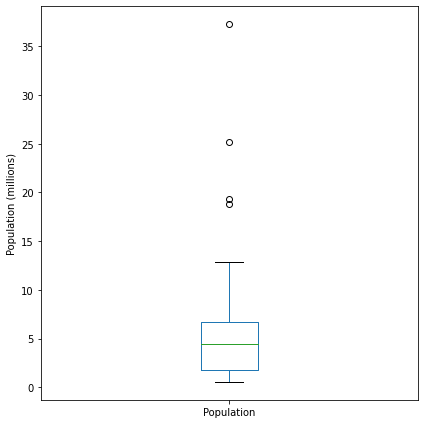

In [28]:
ax = (state['Population']/1_000_000).plot.box(figsize=(6, 6))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

From this boxplot we can immediately see that the *median* state population is about 5 million, half the states fall between about 2 million and about 7 million, and there are some high population *outliers*. The top and bottom of the box are the 75th and 25th percentiles, respectively. The median is shown by the horizontal line in the box. The dashed lines, referred to as whiskers, extend from the top and bottom of the box to indicate the range for the bulk of the data. There are many variations of a boxplot; see, for example, the documentation for the R function boxplot [R-base-2015]. By default, the R function extends the whiskers to the furthest point beyond the box, except that it will not go beyond $1.5$ times the *IQR*. Matplotlib uses the same implementation; other software may use a different rule.

Any data outside of the whiskers is plotted as single points or circles (often considered outliers).

## Frequency Table and Histograms

A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment. 

The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.

In [29]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [31]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
    
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


The least populous state is Wyoming, with $563,626$ people, and the most populous is California, with $37,253,956$ people. This gives us a range of $37,253,956 – 526,935 = 36,690,330$, which we must divide up into equal size bins—let’s say 10 bins. With 10 equal size bins, each bin will have a width of $3,669,033$, so the first bin will span from $563,626$ to $4,232,658$. By contrast, the top bin, $33,584,923$ to $37,253,956$, has only one state: California. The two bins immediately below California are empty, until we reach Texas. It is important to include the empty bins; the fact that there are no values in those bins is useful information. It can also be useful to experiment with different bin sizes. If they are too large, important features of the distribution can be obscured. If they are too small, the result is too granular, and the ability to see the bigger picture is lost.

**Note**

Both frequency tables and percentiles summarize the data by creating bins. In general, quartiles and deciles will have the same count in each bin (equal-count bins), but the bin sizes will be different. The frequency table, by contrast, will have different counts in the bins (equal-size bins), and the bin sizes will be the same.


A histogram is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis. In Figure 1-3, for example, the bin centered at 10 million (1e+07) runs from roughly 8 million to 12 million, and there are six states in that bin.

`pandas` supports histograms for data frames with the `DataFrame.plot.hist` method. Use the keyword argument `bins` to define the number of bins. The various plot methods return an axis object that allows further fine-tuning of the visualization using Matplotlib:

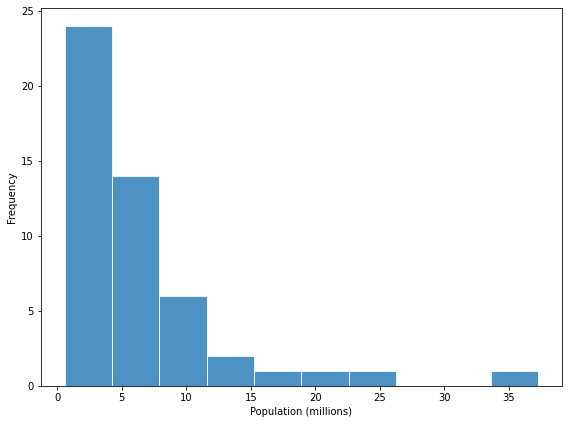

In [39]:
# Figure 1.3
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(8, 6), edgecolor="white", alpha=0.8)
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

The histogram is shown in Figure 1-3. In general, histograms are plotted such that:

- Empty bins are included in the graph.
- Bins are of equal width.
- The number of bins (or, equivalently, bin size) is up to the user.
- Bars are contiguous—no empty space shows between bars, unless there is an empty bin.


**Statistical Moments**

In statistical theory, location and variability are referred to as the **first and second moments** of a distribution. The third and fourth moments are called *skewness* and *kurtosis*. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values. Generally, metrics are not used to measure skewness and kurtosis; instead, these are discovered through visual displays such as Figures 1-2 and 1-3.


## Density Estimates

Related to the histogram is a *density plot*, which shows the distribution of data values as a continuous line. A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a kernel density estimate (see [Duong-2001](https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/bibliography01.html#Duong-2001) for a short tutorial). Figure 1-4 displays a density estimate superposed on a histogram.

Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve.

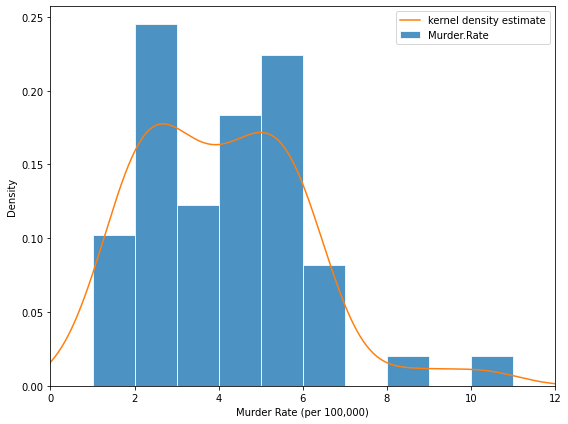

In [49]:
# Figure 1.4
ax = state['Murder.Rate'].plot.hist(
    density=True, 
    xlim=[0, 12], 
    bins=range(1,12), 
    figsize=(8, 6), 
    edgecolor="white", 
    alpha=0.8
)
state['Murder.Rate'].plot.density(ax=ax, label="kernel density estimate")
ax.set_xlabel('Murder Rate (per 100,000)')

plt.legend()
plt.tight_layout()
plt.show()

A key distinction from the histogram plotted in Figure 1-3 is the scale of the y-axis: a density plot corresponds to plotting the histogram as a *proportion* rather than counts (you specify this in Python using the argument `density=True`). Note that the total area under the density curve = 1, and instead of counts in bins you calculate areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution lying between those two points.

**Density Estimation**

Density estimation is a rich topic with a long history in statistical literature. In fact, over 20 R packages have been published that offer functions for density estimation. [Deng-Wickham-2011] give a comprehensive review of R packages, with a particular recommendation for ASH or KernSmooth. The density estimation methods in pandas and scikit-learn also offer good implementations. For many data science problems, there is no need to worry about the various types of density estimates; it suffices to use the base functions.


**Key Ideas**

- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.
- A frequency table is a tabular version of the frequency counts found in a histogram.
- A boxplot—with the top and bottom of the box at the 75th and 25th percentiles, respectively—also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.
- A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates are possible, of course).

**Further Reading**

- A SUNY Oswego professor provides a [step-by-step guide to creating a boxplot](https://oreil.ly/wTpnE).
- Matthew Conlen published an [interactive presentation](https://oreil.ly/bC9nu) that demonstrates the effect of choosing different kernels and bandwidth on kernel density estimates.



## Exploring Binary and Categorical Data

For categorical data, simple proportions or percentages tell the story of the data.

**Key Terms for Exploring Categorical Data**

- Mode: The most commonly occurring category or value in a data set.
- Expected value: When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.
- Bar charts: The frequency or proportion for each category plotted as bars.
- Pie charts: The frequency or proportion for each category plotted as wedges in a pie.

Getting a summary of a binary variable or a categorical variable with a few categories is a fairly easy matter: we just figure out the proportion of 1s, or the proportions of the important categories. For example, Table 1-6 shows the percentage of delayed flights by the cause of delay at Dallas/Fort Worth Airport in 2010. Delays are categorized as being due to factors under carrier control, air traffic control (ATC) system delays, weather, security, or a late inbound aircraft.

In [7]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
(100 * dfw / dfw.values.sum()).round(2)

,Carrier,ATC,Weather,Security,Inbound
0,23.02,30.4,4.03,0.12,42.43


Bar charts, seen often in the popular press, are a common visual tool for displaying a single categorical variable. Categories are listed on the x-axis, and frequencies or proportions on the y-axis. Figure 1-5 shows the airport delays per year by cause for Dallas/Fort Worth (DFW).

_Pandas_ also supports bar charts for displaying a single categorical variable.

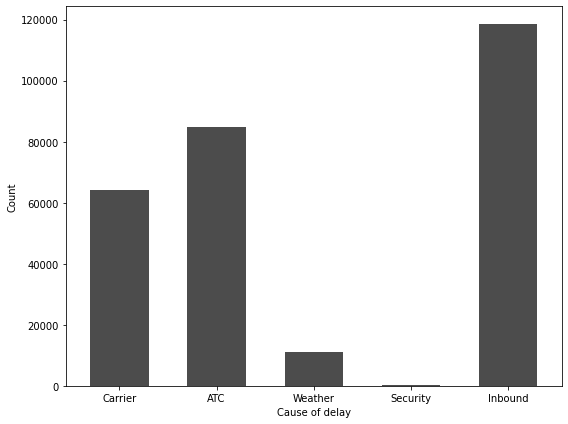

In [16]:
ax = dfw.transpose().plot.bar(figsize=(8, 6), legend=False, width=0.6, color="black", alpha=0.7)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')
ax.set_xticklabels(dfw.columns, rotation=0)

plt.tight_layout()
plt.show()

Note that a bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale. In a histogram, the bars are typically shown touching each other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another.

Pie charts are an alternative to bar charts, although statisticians and data visualization experts generally eschew pie charts as less visually informative (see [[Few-2007]](https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/bibliography01.html#Few-2007)).

**Numerical Data as Categorical Data**

In “Frequency Tables and Histograms”, we looked at frequency tables based on binning the data. This implicitly converts the numeric data to an ordered factor. In this sense, histograms and bar charts are similar, except that the categories on the x-axis in the bar chart are not ordered. Converting numeric data to categorical data is an important and widely used step in data analysis since it reduces the complexity (and size) of the data. This aids in the discovery of relationships between features, particularly at the initial stages of an analysis.

### Mode

The *mode* is the value—or values in case of a tie—that appears most often in the data. For example, the mode of the cause of delay at Dallas/Fort Worth airport is “Inbound.” As another example, in most parts of the United States, the mode for religious preference would be Christian. The mode is a simple summary statistic for categorical data, and it is generally not used for numeric data.

### Expected Value

A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale. A marketer for a new cloud technology, for example, offers two levels of service, one priced at \$300/month and another at \$50/month. The marketer offers free webinars to generate leads, and the firm figures that 5% of the attendees will sign up for the \$300 service, 15% will sign up for the \$50 service, and 80% will not sign up for anything. This data can be summed up, for financial purposes, in a single “expected value,” which is a form of weighted mean, in which the weights are probabilities.

The expected value is calculated as follows:
- Multiply each outcome by its probability of occurrence.
- Sum these values.

In the cloud service example, the expected value of a webinar attendee is thus \$22.50 per month, calculated as follows:
$$ \text{EV} = (0.05)(300) + (0.15)(50) + (0.8)(0) = 22.5 $$

The expected value is really a form of weighted mean: it adds the ideas of future expectations and probability weights, often based on subjective judgment. Expected value is a fundamental concept in business valuation and capital budgeting—for example, the expected value of five years of profits from a new acquisition, or the expected cost savings from new patient management software at a clinic.

### Probability

We referred above to the probability of a value occurring. Most people have an intuitive understanding of probability, encountering the concept frequently in weather forecasts (the chance of rain) or sports analysis (the probability of winning). Sports and games are more often expressed as odds, which are readily convertible to probabilities (if the odds that a team will win are 2 to 1, its probability of winning is 2/(2+1) = 2/3). Surprisingly, though, the concept of probability can be the source of deep philosophical discussion when it comes to defining it. Fortunately, we do not need a formal mathematical or philosophical definition here. For our purposes, the probability that an event will happen is the proportion of times it will occur if the situation could be repeated over and over, countless times. Most often this is an imaginary construction, but it is an adequate operational understanding of probability.


**Key Ideas**
- Categorical data is typically summed up in proportions and can be visualized in a bar chart.
- Categories might represent distinct things (apples and oranges, male and female), levels of a factor variable (low, medium, and high), or numeric data that has been binned.
- Expected value is the sum of values times their probability of occurrence, often used to sum up factor variable levels.

In [24]:
print(state["Murder.Rate"].value_counts().iloc[:10])  # values and counts

state["Murder.Rate"].mode()  # most frequent value(s)

2.0    3
1.6    3
5.7    3
5.8    2
2.3    2
5.6    2
3.6    2
4.8    2
4.4    2
3.1    2
Name: Murder.Rate, dtype: int64


0    1.6
1    2.0
2    5.7
dtype: float64

In [36]:
# expected value
print(state["Murder.Rate"].mean())
sum([rate * state["Murder.Rate"].value_counts()[rate] / len(state) for rate in state["Murder.Rate"].unique()])  # EV is identical to mean here because we calculate with Muder.Rate

4.066


4.066000000000002

## Correlation

Exploratory data analysis in many modeling projects (whether in data science or in research) involves examining correlation among predictors, and between predictors and a target variable. Variables $X$ and $Y$ (each with measured data) are said to be *positively correlated* if high values of $X$ go with high values of $Y$, and low values of $X$ go with low values of $Y$. If high values of $X$ go with low values of $Y$, and vice versa, the variables are *negatively correlated*.

**Key Terms for Correlation**

- Correlation coefficient: A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).
- Correlation matrix: A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.
- Scatterplot: A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

Consider these two variables, perfectly correlated in the sense that each goes from low to high:
$$ \begin{align*} v_1= \{1, 2, 3\} \\ v_2= \{4, 5, 6\} \end{align*}$$

The vector sum of products is $1\cdot{}4+2\cdot{}5+3\cdot{}6=32$. Now try shuffling one of them and recalculating—the vector sum of products will never be higher than 32. So this sum of products could be used as a metric; that is, the observed sum of 32 could be compared to lots of random shufflings (in fact, this idea relates to a resampling-based estimate; see “Permutation Test”). Values produced by this metric, though, are not that meaningful, except by reference to the resampling distribution.

More useful is a standardized variant: the *correlation coefficient*, which gives an estimate of the correlation between two variables that always lies on the same scale. To compute **Pearson’s correlation coefficient**, we multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of the standard deviations:
$$ r = \cfrac{\Sigma_{i=1}^n(x_i - \bar{x}) (y_i - \bar{y})}{(n-1)s_x s_y} $$

Note that we divide by $n-1$ instead of $n$; The correlation coefficient always lies between $+1$ (perfect positive correlation) and $–1$ (perfect negative correlation); $0$ indicates no correlation.

Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric. The relationship between tax rates and revenue raised is an example: as tax rates increase from zero, the revenue raised also increases. However, once tax rates reach a high level and approach 100%, tax avoidance increases and tax revenue actually declines.

Table 1-7, called a *correlation matrix*, shows the correlation between the daily returns for telecommunication stocks from July 2012 through June 2015. From the table, you can see that Verizon (VZ) and ATT (T) have the highest correlation. Level 3 (LVLT), which is an infrastructure company, has the lowest correlation with the others. Note the diagonal of 1s (the correlation of a stock with itself is 1) and the redundancy of the information above and below the diagonal.

Table 1-7. Correlation between telecommunication stock returns
|   |T | CTL | FTR | VZ | LVLT |
|---|---|---|---|---|---|
| T | 1.000 | 0.475 |  0.328| 0.678 | 0.279 |
| CTL | 0.475|  1.000 | 0.420 | 0.417 | 0.287 |
| FTR | 0.328 | 0.420 | 1.000 | 0.287 | 0.260 | 
| VZ | 0.678 |  0.417 | 0.287 | 1.000 | 0.242 | 
| LVLT | 0.279 | 0.287 | 0.260 | 0.242 | 1.000 | 


In [38]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [43]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
print(telecom.corr())

             T       CTL       FTR        VZ      LVLT
T     1.000000  0.474683  0.327767  0.677612  0.278626
CTL   0.474683  1.000000  0.419757  0.416604  0.286665
FTR   0.327767  0.419757  1.000000  0.287386  0.260068
VZ    0.677612  0.416604  0.287386  1.000000  0.242199
LVLT  0.278626  0.286665  0.260068  0.242199  1.000000


In [44]:
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


Next we focus on funds traded on major exchanges (sector == 'etf'). 

A table of correlations like Table 1-7 is commonly plotted to visually display the relationship between multiple variables. Figure 1-6 shows the correlation between the daily returns for major exchange-traded funds (ETFs).

In [46]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The _seaborn_ package provides a convenient implementation for heatmaps.

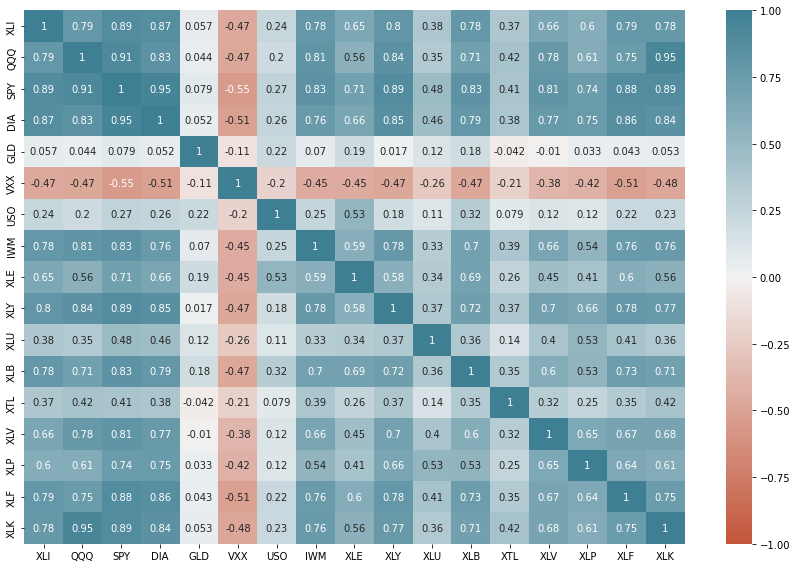

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax, annot=True)

plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

<ipython-input-50-c2bbeacd1a09>:38: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = fig.colorbar(m)


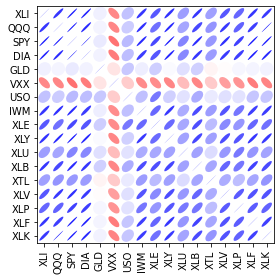

In [50]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data. Software packages offer robust alternatives to the classical correlation coefficient. For example, the R package robust uses the function covRob to compute a robust estimate of correlation. The methods in the scikit-learn module sklearn.covariance implement a variety of approaches.

**Other Correlation Estimates**

Statisticians long ago proposed other types of correlation coefficients, such as **Spearman’s rho** or **Kendall’s tau**. These are correlation coefficients based on the *rank* of the data. Since they work with ranks rather than values, these estimates are robust to outliers and can handle certain types of nonlinearities. However, data scientists can generally stick to Pearson’s correlation coefficient, and its robust alternatives, for exploratory analysis. The appeal of rank-based estimates is mostly for smaller data sets and specific hypothesis tests.


### Scatterplots

The standard way to visualize the relationship between two measured data variables is with a scatterplot. The x-axis represents one variable and the y-axis another, and each point on the graph is a record. See Figure 1-7 for a plot of the correlation between the daily returns for ATT and Verizon. 

Simple scatterplots are supported by _pandas_. Specifying the marker as `$\u25EF$` uses an open circle for each point.

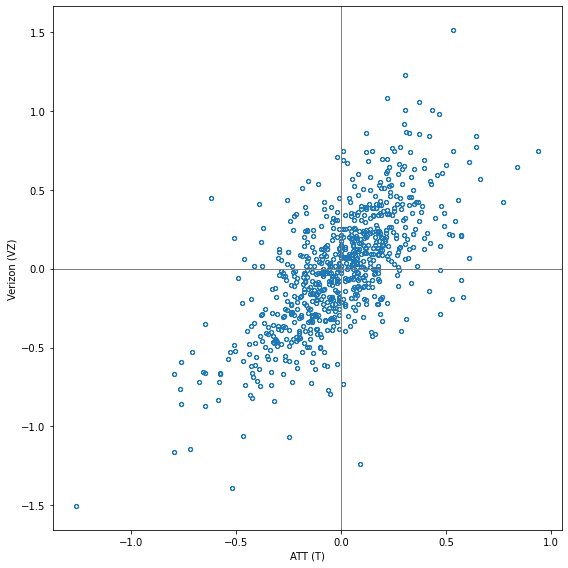

In [63]:
# Figure 1-7
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(8, 8), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

The returns have a positive relationship: while they cluster around zero, on most days, the stocks go up or go down in tandem (upper-right and lower-left quadrants). There are fewer days where one stock goes down significantly while the other stock goes up, or vice versa (lower-right and upper-left quadrants).

While the plot Figure 1-7 displays only 754 data points, it’s already obvious how difficult it is to identify details in the middle of the plot. We will see later how adding transparency to the points, or using hexagonal binning and density plots, can help to find additional structure in the data.

Line2D(_line1)


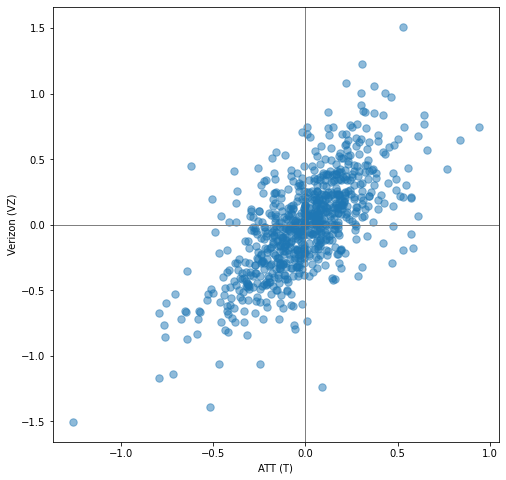

In [67]:
#ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(8, 8), s=55, alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))


**Key Ideas**

- The correlation coefficient measures the extent to which two paired variables (e.g., height and weight for individuals) are associated with one another.
- When high values of v1 go with high values of v2, v1 and v2 are positively associated.
- When high values of v1 go with low values of v2, v1 and v2 are negatively associated.
- The correlation coefficient is a standardized metric, so that it always ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).
- A correlation coefficient of zero indicates no correlation, but be aware that random arrangements of data will produce both positive and negative values for the correlation coefficient just by chance.



## Exploring Two or More Variables

Familiar estimators like mean and variance look at variables one at a time (univariate analysis). Correlation analysis (see “Correlation”) is an important method that compares two variables (bivariate analysis). In this section we look at additional estimates and plots, and at more than two variables (multivariate analysis).

**Key Terms for Exploring Two or More Variables**

- Contingency table: A tally of counts between two or more categorical variables.
- Hexagonal binning: A plot of two numeric variables with the records binned into hexagons.
- Contour plot: A plot showing the density of two numeric variables like a topographical map.
- Violin plot: Similar to a boxplot but showing the density estimate.

Like univariate analysis, bivariate analysis involves both computing summary statistics and producing visual displays. The appropriate type of bivariate or multivariate analysis depends on the nature of the data: numeric versus categorical.

### Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)

Scatterplots are fine when there is a relatively small number of data values. The plot of stock returns in Figure 1-7 involves only about 750 points. For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship. To illustrate, consider the data set `kc_tax`, which contains the tax-assessed values for residential properties in King County, Washington.

In order to focus on the main part of the data, we strip out very expensive and very small or large residences using `pandas`:

In [69]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

In [70]:
kc_tax0.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


Figure 1-8 is a hexagonal binning plot of the relationship between the finished square feet and the tax-assessed value for homes in King County.

Text(0, 0.5, 'Tax-Assessed Value')

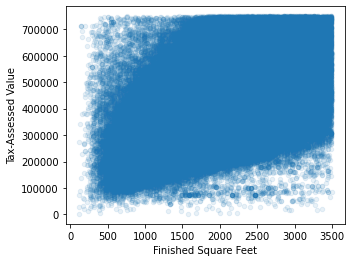

In [80]:
ax = kc_tax0.plot.scatter(x='SqFtTotLiving', y='TaxAssessedValue',
                            sharex=False, figsize=(5, 4), alpha=0.1)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

Text(0, 0.5, 'Tax-Assessed Value')

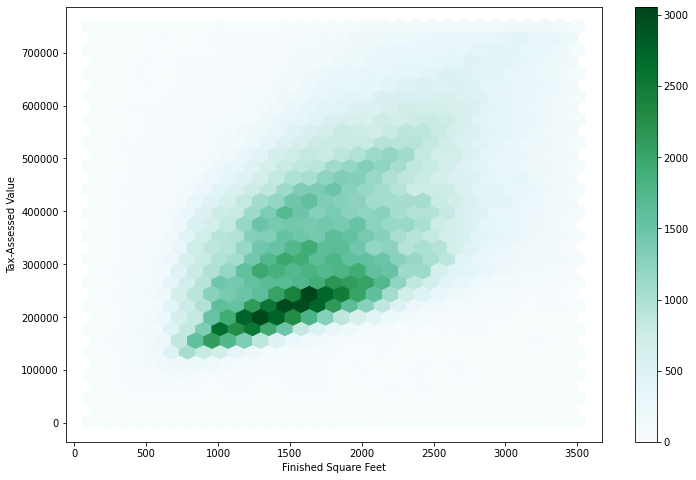

In [72]:
# Figure 1-8
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(12, 8))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

Rather than plotting points, which would appear as a monolithic dark cloud, we grouped the records into *hexagonal bins* and plotted the hexagons with a color indicating the number of records in that bin. In this chart, the positive relationship between square feet and tax-assessed value is clear. An interesting feature is the hint of additional bands above the main (darkest) band at the bottom, indicating homes that have the same square footage as those in the main band but a higher tax-assessed value.

The _seaborn_ kdeplot is a two-dimensional extension of the density plot. The calculation of the 2D-density for the full dataset takes several minutes. It is sufficient to create the visualization with a smaller sample of the dataset. With 10,000 data points, creating the graph takes only seconds. While some details may be lost, the overall shape is preserved. 

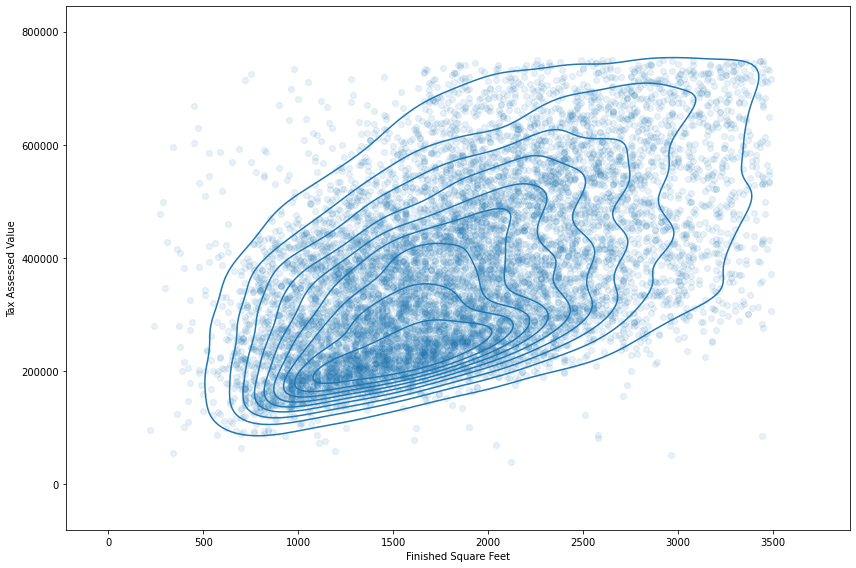

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.scatter(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', s=35, alpha=0.1)

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

Other types of charts are used to show the relationship between two numeric variables, including heat maps. Heat maps, hexagonal binning, and contour plots all give a visual representation of a two-dimensional density. In this way, they are natural analogs to histograms and density plots.

### Two Categorical Variables

A useful way to summarize two categorical variables is a contingency table—a table of counts by category. Table 1-8 shows the contingency table between the grade of a personal loan and the outcome of that loan. This is taken from data provided by Lending Club, a leader in the peer-to-peer lending business. The grade goes from A (high) to G (low). The outcome is either fully paid, current, late, or charged off (the balance of the loan is not expected to be collected). This table shows the count and row percentages. High-grade loans have a very low late/charge-off percentage as compared with lower-grade loans.

Load the `lc_loans` dataset

In [86]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

In [88]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=len, margins=True)  # margin keyword adds column and row sums
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [89]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


In [102]:
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
pd.crosstab(index=lc_loans.grade, columns=lc_loans.status, normalize=False)  # normalize="index" divides by row count

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


In [96]:
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


## Categorical and Numeric Data
_Pandas_ boxplots of a column can be grouped by a different column.

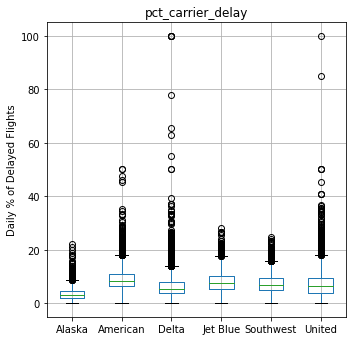

In [37]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

_Pandas_ also supports a variation of boxplots called _violinplot_. 

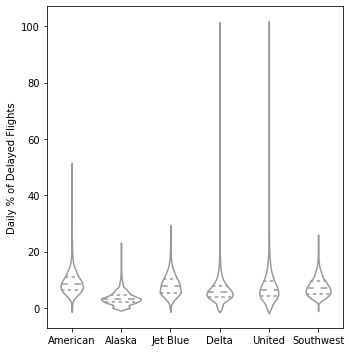

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

## Visualizing Multiple Variables

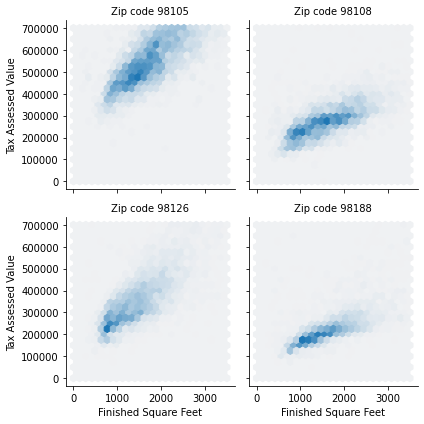

In [39]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()